# Various visualizations of baseball attributes in python
This contains three visualizations produced in python from a data set of MLB data that can be found in the github repository. The code also saves the plots as PDFs into the user's working directory. My personal favorite plot is the first, which shows all the baseball teams over time as a scatterplot.
#### Importing the data

In [29]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
    
# Data can be found in the github repository 
data = data = pd.read_csv('batting_data.csv')
data = data.values

#### Creating a scatter plot of all the Major League Baseball teams over time.

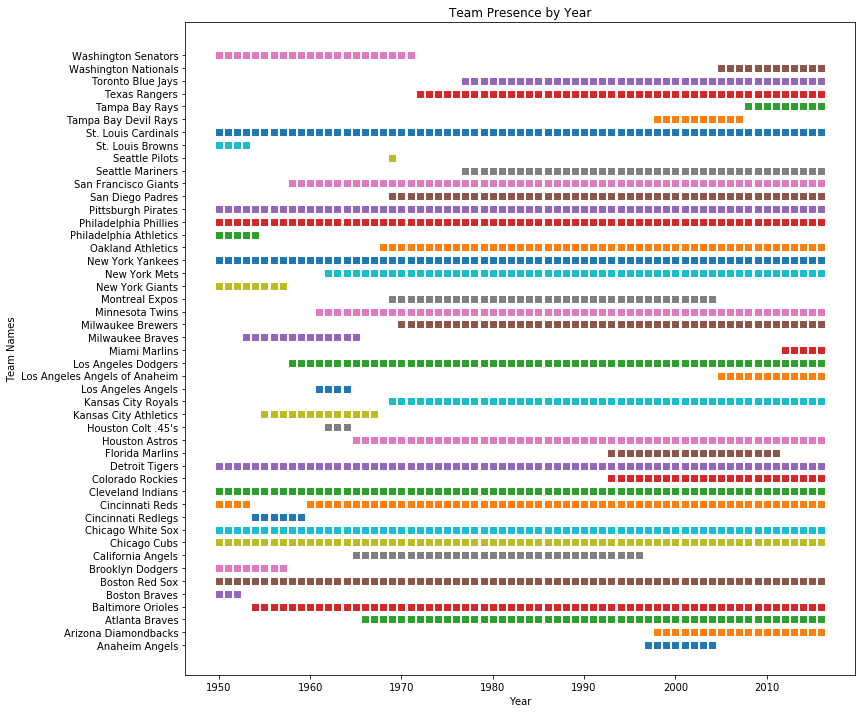

In [25]:
array = data
unique_teams = np.unique(array[:, BattingData.team_name])
# Find Unique Team names
unique_year = np.unique(array[:, BattingData.year])
# Find Unique years in the data

plt.figure(figsize = (12,12))
# Resize the plot

height = 0
# This variable will be used for the height of each team in the plot
for team in unique_teams: 
# Iterating over unique teams
    height_list = []
    # Empty height list
    # id_locations are the locations where the player ID is equal to the unique ID (the current one we're iterating on)
    team_locations = np.where(array[:, BattingData.team_name] == team)

    # This creates a mini array using the id_locations 
    team_loc_list = array[team_locations]
    team_years = np.unique(team_loc_list[:,BattingData.year]).astype(np.int32)
    # List of the years each team was active

    for year in team_years:
    # Iterating over years each team was active
        height_list.append(height)
        # Appending the height of that team for the plot
    height = height + 1
    # Changing the height for each team
    plt.scatter(team_years, height_list, marker = "s")
    # Creating the scatter plot using square markers, with teamyears as the x axis and the height as the y axis

plt.yticks(np.arange(len(unique_teams)), unique_teams)
# Labels on the side of the y axis
plt.xlabel("Year")
plt.ylabel("Team Names")
plt.title("Team Presence by Year")
plt.savefig("Scatterplot of team presence.pdf")
plt.show()   

#### Creating a histogram of runs scored (lifetime). 

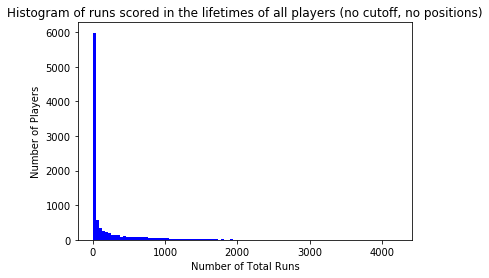

In [26]:
unique_ids = np.unique(array[:,BattingData.player_id])

run_list = []
# Create an empty list that will be the base of our histogram

# Iterates through each player
for ids in unique_ids:  
    # id_locations are the locations where the player ID is equal to the unique ID (the current one we're iterating on)
    id_locations = np.where(array[:, BattingData.player_id] == ids)
    # This creates a mini array using the id_locations 
    location_list = array[id_locations]
    # Sets a variable = to zero
    sum1 = 0
    # Iterating through the items in the mini array
    for item in location_list:
    # Adds the current sum of runs to other runs for the single player (ids)
        sum1 = sum1 + int(item[BattingData.runs])
    # Appends the run list for the player to the empty list before iterating to the next unique player
    run_list.append(sum1)

# If the user selects option 1, this creates a histogram using the run_list
n, bins, patches = plt.hist(run_list, 100, facecolor='blue')
plt.title("Histogram of runs scored in the lifetimes of all players (no cutoff, no positions)") 
plt.xlabel("Number of Total Runs")
plt.ylabel("Number of Players")
# Saves figure as pdf
plt.savefig("Histogram of runs scored (no cutoff, no positions).pdf")
plt.show()

#### Creating a chart of homeruns by decade, maximum, 95th and 50th percentiles.

In [27]:
unique_years = np.unique(array[:, BattingData.year])
hr_95th = []
hr_50th = []
max_hr = []
# Empty lists to put things in

for years in unique_years:
# Iterating over each unique year
    year_location = np.where(array[:, BattingData.year] == years)
    # Finding locations where those years appear        
    hr_95_array = array[year_location]
    hr_50_array = array[year_location]
    hr_max_array = array[year_location]
    
    # Creating three arrays to eventually add to a chart using the year locations
    # These contain every location where a unique year occurs        
    hr_95_array = np.array(hr_95_array[:, BattingData.home_runs].astype(int))
    hr_50_array = np.array(hr_50_array[:, BattingData.home_runs].astype(int))
    hr_max_array = np.array(hr_max_array[:, BattingData.home_runs].astype(int))
   
    # Making those arrays numpy arrays with home_run data
    # These arrays now contain integers of the homerun data matched with the locations of the unique years        
    hr_95_array = np.sort(hr_95_array)
    hr_50_array = np.sort(hr_50_array)
    hr_max_array = np.max(hr_max_array)
    
    # Sorting the home run arrays so that we can find cutoffs
    # Maximizing the hr_max array
    cutoff_95 = 0.95 * len(hr_95_array)
    cutoff_50 = 0.5 * len(hr_50_array)
    
    # Making a cutoff for the 95th and 50th percentiles
    hr_95_newarray = hr_95_array[int(cutoff_95)]
    hr_50_newarray = hr_50_array[int(cutoff_50)]
    
    # These new arrays only contain the data for the percentiles using the cutoffs
    hr_95th.append(hr_95_newarray)
    hr_50th.append(hr_50_newarray)        
    max_hr.append(hr_max_array)
    # Appending the data to the previous lists that we made before the loop
    # These lists will be the basis of our graphs

#### Plotting the chart of homeruns.

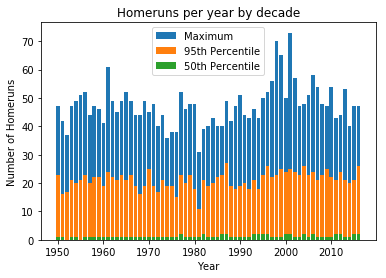

In [31]:
x_axis = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
# This provides the list of x_axis ticks
plt.bar(range(len(max_hr)), max_hr, tick_label = unique_years, label = "Maximum")
# Plot a bar using the length of the list of homeruns, and the actual data in the list of the homeruns
# Using the unique years as label (only once because we're stacking), and creating a label
plt.bar(range(len(hr_95th)), hr_95th, label = "95th Percentile")
plt.bar(range(len(hr_50th)), hr_50th,  label = "50th Percentile")
# These three bar graphs stack on top of each other
plt.title("Homeruns per year by decade")
plt.xticks(np.arange(0, 67, 10), x_axis)
# This np.arange starts at 0 and ends at 67 (number of unique years +1 -> 1950 to 2016) taking 10 year steps, using the data from the x_axis list
# It would be helpful to be taught these numpy functions in lecture instead of learning them in CSEL
plt.xlabel("Year")
plt.ylabel("Number of Homeruns")
plt.legend()
# Saving figure as pdf
plt.savefig("Homeruns per year by decade.pdf")
plt.show()